.. _VisualisingGraphs:

# Visualising Provenance Graphs

In [5]:
from aiida import load_profile
profile = load_profile()

In [42]:
from aiida.backends.tests.utils.archives import get_archive_file
from aiida.tools.visualization import Graph, pstate_node_styles

In [ ]:
archive_path = get_archive_file('graph1.aiida', 'graphs')
!verdi import -n {archive_path}

In [29]:
dict1_uuid = '279ec6e1-8bf0-43fb-a9af-c71d39fe2d76'
calc1_uuid = '93cd9b2f-d3ce-4214-b331-5808f55073b3'

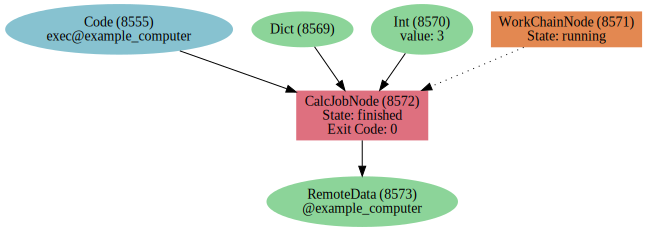

In [46]:
graph = Graph()
graph.add_incoming(calc1_uuid)
graph.add_outgoing(calc1_uuid)
graph.graphviz

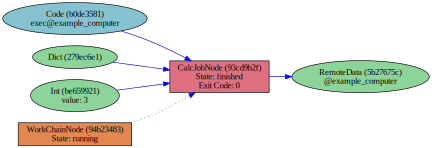

In [41]:
graph = Graph(node_id_type="uuid",
              global_node_style={"penwidth": 1},
              global_edge_style={"color": "blue"},
              graph_attr={"size": "6,6!", "rankdir": "LR"})
graph.add_incoming(calc1_uuid)
graph.add_outgoing(calc1_uuid)
graph.graphviz

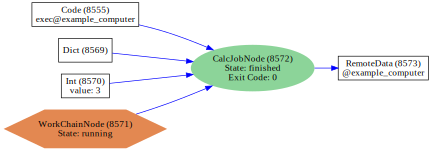

In [47]:
def link_style(link_pair, **kwargs):
    return {"color": "blue"}

graph = Graph(node_style_fn=pstate_node_styles,
              link_style_fn=link_style,
              graph_attr={"size": "6,6!", "rankdir": "LR"})
graph.add_incoming(calc1_uuid)
graph.add_outgoing(calc1_uuid)
graph.graphviz

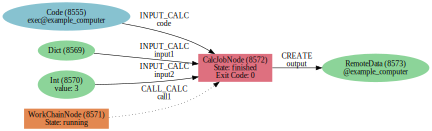

In [49]:
graph = Graph(graph_attr={"size": "6,6!", "rankdir": "LR"})
graph.add_incoming(calc1_uuid,
                   annotate_links="both")
graph.add_outgoing(calc1_uuid,
                   annotate_links="both")
graph.graphviz

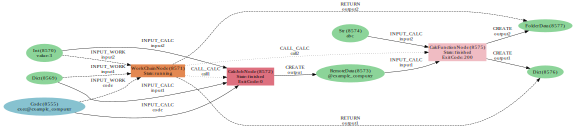

In [50]:
graph = Graph(graph_attr={"size": "8,8!", "rankdir": "LR"})
graph.recurse_descendants(
    dict1_uuid, 
    include_process_inputs=True,
    annotate_links="both"
)
graph.graphviz

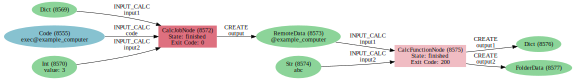

In [51]:
graph = Graph(graph_attr={"size": "8,8!", "rankdir": "LR"})
graph.recurse_descendants(
    dict1_uuid, 
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_calc", "create")
)
graph.graphviz

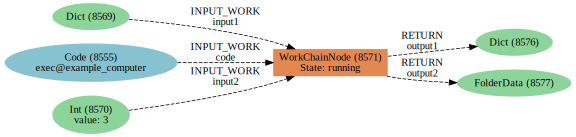

In [52]:
graph = Graph(graph_attr={"size": "8,8!", "rankdir": "LR"})
graph.recurse_descendants(
    dict1_uuid,
    include_process_inputs=True,
    annotate_links="both",
    link_types=("input_work", "return")
)
graph.graphviz